In [1]:
import os
import pandas as pd

In [2]:
from utils import CLASS_NAME_TO_ID, visualize

In [3]:
CLASS_NAME_TO_ID

{'Bus': 0, 'Truck': 1}

In [4]:
data_dir = './DRIVING-DATASET/Detection/'
data_df = pd.read_csv(os.path.join(data_dir, 'df.csv'))

In [5]:
data_df

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,0000599864fd15b3,xclick,Bus,1,0.343750,0.908750,0.156162,0.650047,1,0,...,0,0,0.421875,0.343750,0.795000,0.908750,0.156162,0.512700,0.650047,0.457197
1,00006bdb1eb5cd74,xclick,Truck,1,0.276667,0.697500,0.141604,0.437343,1,0,...,0,0,0.299167,0.276667,0.697500,0.659167,0.141604,0.241855,0.352130,0.437343
2,00006bdb1eb5cd74,xclick,Truck,1,0.702500,0.999167,0.204261,0.409774,1,1,...,0,0,0.849167,0.702500,0.906667,0.999167,0.204261,0.398496,0.409774,0.295739
3,00010bf498b64bab,xclick,Bus,1,0.156250,0.371250,0.269188,0.705228,0,0,...,0,0,0.274375,0.371250,0.311875,0.156250,0.269188,0.493882,0.705228,0.521691
4,00013f14dd4e168f,xclick,Bus,1,0.287500,0.999375,0.194184,0.999062,0,1,...,0,0,0.920000,0.999375,0.648750,0.287500,0.194184,0.303940,0.999062,0.523452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24057,fff2b15ad6007d0e,activemil,Truck,1,0.277344,0.622656,0.226389,0.859722,0,0,...,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
24058,fff376d20410e4c9,xclick,Bus,1,0.295625,0.558750,0.306667,0.397500,1,0,...,1,0,0.424375,0.316250,0.295625,0.558750,0.306667,0.397500,0.382500,0.335833
24059,fff376d20410e4c9,xclick,Bus,1,0.348125,0.701250,0.423333,0.744167,0,0,...,1,0,0.478750,0.493125,0.348125,0.701250,0.423333,0.744167,0.537500,0.523333
24060,fffde5953a818927,xclick,Bus,1,0.277500,0.605625,0.565000,0.795833,0,0,...,0,0,0.488125,0.277500,0.517500,0.605625,0.565000,0.670000,0.795833,0.704167


In [6]:
# listdir를 이용하여 images 디렉토리의 .jpg 파일을 읽어와서 0번 파일을 화면에 plt.imshow로 출력
index =0
image_files = [fn for fn in os.listdir('./DRIVING-DATASET/Detection/images/') if fn.endswith('jpg')]
image_file = image_files[index]
image_file

'0000599864fd15b3.jpg'

In [7]:
image_path = os.path.join('./DRIVING-DATASET/Detection/images/', image_file)

In [8]:
image_path

'./DRIVING-DATASET/Detection/images/0000599864fd15b3.jpg'

In [9]:
import cv2
import matplotlib.pyplot as plt

In [10]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [11]:
print(image.shape)

(170, 256, 3)


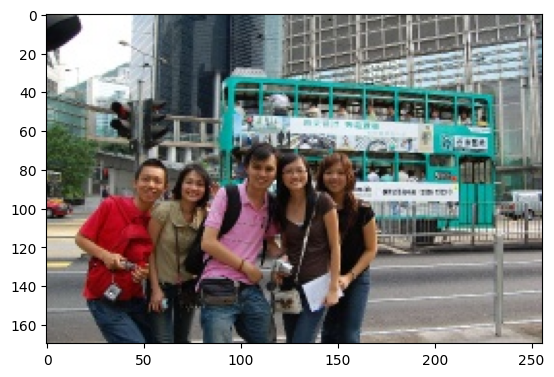

In [12]:
plt.imshow(image)

In [13]:
image_id = image_file.split('.')[0]
image_id

'0000599864fd15b3'

In [14]:
meta_data = data_df[data_df['ImageID'] == image_id]

In [15]:
meta_data

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,0000599864fd15b3,xclick,Bus,1,0.34375,0.90875,0.156162,0.650047,1,0,...,0,0,0.421875,0.34375,0.795,0.90875,0.156162,0.5127,0.650047,0.457197


In [16]:
cate_names = meta_data['LabelName'].values

In [17]:
cate_names

array(['Bus'], dtype=object)

In [18]:
bboxes = meta_data[['XMin', 'XMax', 'YMin','YMax']].values

In [19]:
bboxes

array([[0.34375 , 0.90875 , 0.156162, 0.650047]])

In [20]:
img_H, img_W, _ = image.shape
class_ids = [CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names]

In [21]:
class_ids

[0]

In [22]:
unnorm_bboxes = bboxes.copy()
unnorm_bboxes[:, [1,2]] = unnorm_bboxes[:, [2,1]] # XMax, YMin의 자리를 바꿈
unnorm_bboxes[:, 2:4] -= unnorm_bboxes[:,0:2] # XMax - XMin, YMax - YMin
unnorm_bboxes[:, 0:2] += (unnorm_bboxes[:,2:4]/2) # X_cen, Y_cen = XMin +w/2, YMin +h/2

unnorm_bboxes[:, [0,2]] *= img_W
unnorm_bboxes[:, [1,3]] *= img_H


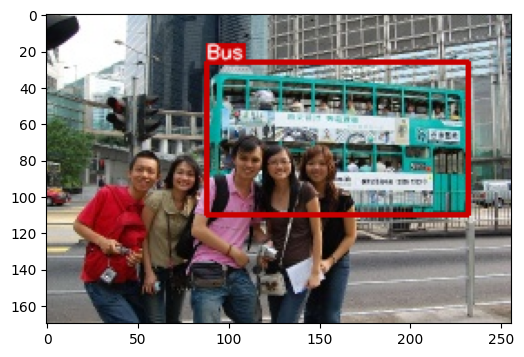

In [23]:
canvas = visualize(image, unnorm_bboxes, class_ids)
plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()

In [24]:
from ipywidgets import interact

In [25]:
@interact(index=(0,len(image_files)-1))
def show_sample(index=0):
    image_file = image_files[index]
    image_path = os.path.join('./DRIVING-DATASET/Detection/images/', image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    image_id = image_file.split('.')[0]
    meta_data = data_df[data_df['ImageID'] == image_id]
    cate_names = meta_data['LabelName'].values
    bboxes = meta_data[['XMin', 'XMax', 'YMin', 'YMax']].values
    
    img_H, img_W, _ = image.shape
    
    class_ids = [CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names]
    unnorm_bboxes = bboxes.copy()
    unnorm_bboxes[:, [1,2]] = unnorm_bboxes[:, [2,1]] # XMax, YMin의 자리를 바꿈
    unnorm_bboxes[:, 2:4] -= unnorm_bboxes[:,0:2] # XMax - XMin, YMax - YMin
    unnorm_bboxes[:, 0:2] += (unnorm_bboxes[:,2:4]/2) # X_cen, Y_cen = XMin +w/2, YMin +h/2

    unnorm_bboxes[:, [0,2]] *= img_W
    unnorm_bboxes[:, [1,3]] *= img_H
    canvas = visualize(image, unnorm_bboxes, class_ids)
    
    plt.figure(figsize=(6,6))
    plt.imshow(canvas)
    plt.axis('off')
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=15224), Output()), _dom_classes=('widget-int…

# Object detection 데이터셋 구축과 연산을 위한 텐서변환 모듈 작성하기

In [26]:
import torch
import numpy as np

In [27]:
class Detection_dataset():
    def __init__(self, data_dir, phase, transformer=None):
        self.data_dir = data_dir
        self.phase = phase
        self.transformer = transformer
        self.data_df = pd.read_csv(os.path.join(self.data_dir, 'df.csv'))
        self.image_files = [fn for fn in os.listdir(os.path.join(self.data_dir, phase)) if fn.endswith('jpg')]
        
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, index):
        filename, image = self.get_image(index)
        bboxes, class_ids = self.get_label(filename)
        img_H, img_W, _ = image.shape
        if self.transformer:
            image = self.transformer(image)
            _, img_H, img_W = image.shape
        
        bboxes[:, [0, 2]] *= img_W
        bboxes[:, [1, 3]] *= img_H
        
        target = {}
        target['boxes'] = torch.Tensor(bboxes).float()
        target['labels'] = torch.Tensor(class_ids).long()
        
        return image, target, filename

    def get_image(self, index):
        filename = self.image_files[index]
        image_path = os.path.join(self.data_dir, self.phase, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return filename, image
    
    def get_label(self, filename):
        image_id = filename.split('.')[0]
        meta_data = self.data_df[self.data_df['ImageID'] == image_id]
        cate_names = meta_data['LabelName'].values
        class_ids = np.array([CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names])
        bboxes = meta_data[['XMin', 'XMax', 'YMin', 'YMax']].values
        bboxes[:, [1, 2]] = bboxes[:, [2, 1]]
        return bboxes, class_ids

In [28]:
data_dir = './DRIVING-DATASET/Detection/'
dataset = Detection_dataset(data_dir = data_dir, phase='train', transformer=None)

In [29]:
len(dataset)

13703

In [30]:
# X1, Y1, X2, Y2 = XMin, YMin, XMax, YMax --> 일반적인 bbox 그리기
# X_cen, Y_cen, W, H --> YOLO SERIES
# X_Min, Y_Min, W, H --> COCO BOUNDING BOX FROMAT

In [31]:
image, target, filename = dataset[0]

In [32]:
image.shape

(170, 256, 3)

In [33]:
image, target, filename = dataset[2]

In [34]:
image.shape

(144, 256, 3)

In [35]:
target

{'boxes': tensor([[ 40.0000,  38.7631,  95.0400, 101.5528]]),
 'labels': tensor([0])}

In [36]:
filename

'00010bf498b64bab.jpg'

In [37]:
dataset.data_df.iloc[0]

ImageID        0000599864fd15b3
Source                   xclick
LabelName                   Bus
Confidence                    1
XMin                    0.34375
XMax                    0.90875
YMin                   0.156162
YMax                   0.650047
IsOccluded                    1
IsTruncated                   0
IsGroupOf                     0
IsDepiction                   0
IsInside                      0
XClick1X               0.421875
XClick2X                0.34375
XClick3X                  0.795
XClick4X                0.90875
XClick1Y               0.156162
XClick2Y                 0.5127
XClick3Y               0.650047
XClick4Y               0.457197
Name: 0, dtype: object

In [38]:
0.34375 * 256

88.0

In [39]:
0.90875*256

232.64

In [40]:
0.156162*170

26.547539999999998

In [41]:
0.750047*170

127.50799

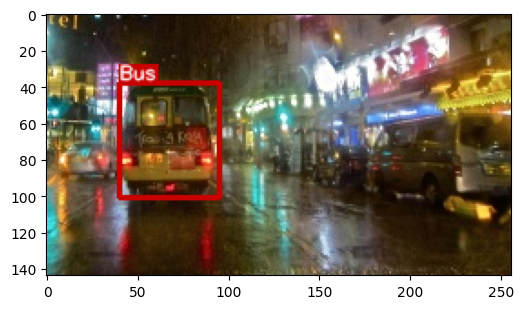

In [42]:
boxes = target['boxes']. numpy()
class_ids = target['labels'].numpy()

n_obj = boxes.shape[0]
bboxes = np.zeros(shape = (n_obj, 4), dtype=np.float32)
bboxes[:, 0:2] = (boxes[:,0:2]+ boxes[:, 2:4]) /2
bboxes[:, 2:4] = boxes[:,2:4]- boxes[:, 0:2]

canvas = visualize(image, bboxes, class_ids)

plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()


In [43]:
@interact(index=(0, len(image_files)-1))
def show_sampe(index=0):
    image, target, filename = dataset[index]
    boxes = target['boxes'].numpy()
    class_ids = target['labels'].numpy()
    
    n_obj = boxes.shape[0]
    bboxes = np.zeros(shape=(n_obj, 4), dtype=np.float32)
    bboxes[:, 0:2] = (boxes[:, 0:2]+ boxes[:,2:4])/2
    bboxes[:, 2:4] = boxes[:, 2:4] - boxes[:, 0:2]
    
    canvas = visualize(image, bboxes, class_ids)
    
    plt.figure(figsize=(6,6))
    plt.imshow(canvas)
    plt.axis('off')
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=15224), Output()), _dom_classes=('widget-int…

In [44]:
from torchvision import transforms

In [45]:
IMAGE_SIZE = 448

transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=(IMAGE_SIZE, IMAGE_SIZE)),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229,0.224,0.225])
])

In [46]:
data_dir = './DRIVING-DATASET/Detection/'
transformed_dataset = Detection_dataset(data_dir = data_dir, phase='train', transformer=transformer)

In [47]:
from torchvision.utils import make_grid

In [48]:
index = 5
image, target, filename = transformed_dataset[index] 

c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


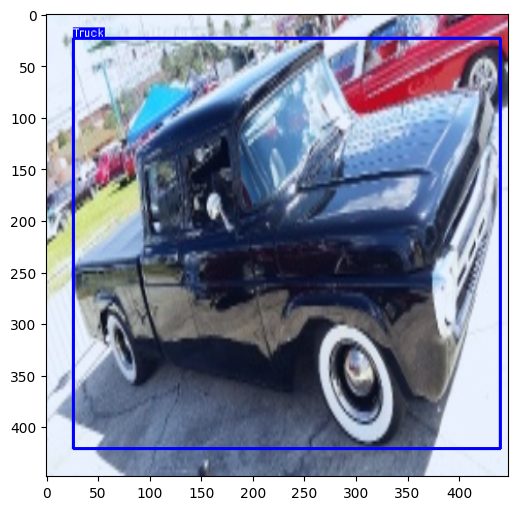

In [49]:
np_image = make_grid(image, normalize=True).permute(1, 2, 0).numpy()
boxes = target['boxes'].numpy()
class_ids = target['labels'].numpy()
    
n_obj = boxes.shape[0]
bboxes = np.zeros(shape=(n_obj, 4), dtype=np.float32)
bboxes[:, 0:2] = (boxes[:, 0:2]+ boxes[:,2:4])/2
bboxes[:, 2:4] = boxes[:, 2:4] - boxes[:, 0:2]
    
canvas = visualize(np_image, bboxes, class_ids)
    
plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()

In [50]:
from torch.utils.data import DataLoader

In [51]:
def collate_fn(batch):
    image_list = []
    target_list = []
    filename_list = []
    
    for a, b, c in batch:
        image_list.append(a)
        target_list.append(b)
        filename_list.append(c)
        
    return image_list, target_list, filename_list



In [52]:
data_dir = './DRIVING-DATASET/Detection/'
BATCH_SIZE = 6

trainset = Detection_dataset(data_dir=data_dir, phase='train', transformer=transformer)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

In [53]:
for index, batch in enumerate(trainloader):
    images = batch[0]
    targets = batch[1]
    filenames = batch[2]
    
    if index == 0:
        break

c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), e

In [54]:
def build_dataloader(data_dir, batch_size=4, image_size=448):
    # transforms.Compose
    # dataloaders = {}
    transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=(IMAGE_SIZE, IMAGE_SIZE)),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229,0.224,0.225])
])
    dataloaders = {}
    train_dataset = Detection_dataset(data_dir=data_dir, phase='train', transformer=transformer)
    dataloaders['train'] = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    
    val_dataset = Detection_dataset(data_dir=data_dir, phase='val', transformer=transformer)
    dataloaders['val'] = DataLoader(val_dataset, batch_size=1, shuffle=True, collate_fn=collate_fn)
    return dataloaders

In [55]:
data_dir = './DRIVING-DATASET/Detection/'
dloaders = build_dataloader(data_dir, batch_size=4, image_size=448)

for phase in ['train', 'val']:
    for index, batch in enumerate(dloaders[phase]):
        images = batch[0]
        targets = batch[1]
        filenames = batch[2]
        print(targets)
        if index ==0:
            break

c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


[{'boxes': tensor([[ 26.8800, 143.4998, 440.8320, 434.0000]]), 'labels': tensor([0])}, {'boxes': tensor([[140.5600,  77.3284, 381.9200, 381.1781]]), 'labels': tensor([1])}, {'boxes': tensor([[ 40.8800, 122.2964, 412.1600, 299.6475]]), 'labels': tensor([0])}, {'boxes': tensor([[ 38.9375, 109.2206, 394.6248, 374.7502]]), 'labels': tensor([1])}]
[{'boxes': tensor([[ 12.2564, 116.2376, 434.8983, 414.7029],
        [173.7057,  33.2972, 447.5775, 285.1457],
        [241.3282,  86.5729, 291.2000, 107.1567]]), 'labels': tensor([1, 1, 1])}]


c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), e

# Faster R-CNN 아키텍처 불러오기

### Object Detection
* 다수의 사물이 존재하는 상황에서 각 사물의 위치와 클래스를 찾는 작업

### Object Detection 방식
* 2-Stage Detector
아래 2문제를 구분해서 순차적으로 해결하는 방식
    * 위치를 찾는 문제(Localization)
        - 물체가 있을법한 위치를 찾음
        - 하나의 이미지 안에서 물체가 있을법한 위치를 찾아 나열하는 과정에 대한 정보를 제안
    * 분류 문제(Classification)
        - 각각의 위치에 대해서 class를 분류
        - 이미지 내의 사물이 존재하는 bounding box를 예측하는 regression 사용
        
* 1-Stage Dectector
    * 위치를 찾는 문제와 분류 문제를 한 번에 해결함
    * 정확도는 2-Stage Detector보다 낮음
    * 정확도는 낮지만 속도가 빠르기 때문에 많이 사용
    * 대표적인 예시는 YOLO

### R-CNN(Regions with CNN features) 기법
* Selective search를 이용해 2000개의 RoI를 추출
* 각 RoI에 대하여 warping을 수행하여 동일한 크기의 입력 이미지로 변경
* 이미지를 CNN에 넣어서(forward) 벡터(특징) 이미지를 추출
* 해당 feature를 SVM에 넣어 class 분류 결과를 얻음
* 해당 feature를 regressor에 넣어 위치를 조절해 예측

### R-CNN의 단점
* 입력 이미지에 대해 CPU 기반의 Selective search를 진행하므로 많은 시간이 소요
* 전체 아키텍처에서 SVM, Regressor 모듈이 CNN과 분리되어 있음
* CNN은 고정되므로 SVM과 Regression 결과로 CNN을 업데이트할 수 없음
* end-to-end 방식으로 학습 불가능

### Fast R-CNN
* 동일한 Region proposal을 이용하되 이미지를 한 번만 CNN에 넣어 Feature Map을 생성

#### 👻Region proposal
물체가 있을 법한 위치 찾기
- 이미지에서 다양한 형태의 윈도우를 슬라이딩하며 물체가 존재하는지 확인
- 너무 많은 영역에 대해 확인해야 한다는 단점
- Fast R-CNN, Faster R-CNN은 sliding window 방식을 사용
- 입력 이미지에 대해 CPU 기반의 Selective search를 진행하므로 많은 시간이 소요

### Faster R-CNN
* 병목에 해당하던 Region Proposal 작업을 GPU 장치에서 수행함(RPN 적용)
* 전체 아키텍처를 end-to-end로 학습
* Feature map을 보고 어느 곳에 물체가 있을지 예측함


#### ✔ RPN(Region Proposal Network)
* k개의 앵커 박스(anchor box)를 이용
* 슬라이이 윈도우를 거쳐 각 위치에 대해 Regression과 Classification을 수행
* 전체 class에 대한 결과가 아닌 물체가 있는지 없는지에 대한 output으로 알려줌
* Regression layer는 bounding box의 위치를 잘 예측할 수 있도록 함

In [56]:
from torchvision import models
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [57]:
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [58]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [59]:
# (cls_score): Linear(in_features=1024, out_features=2, bias=True)
# (cls_score): Linear(in_features=1024, out_features=8, bias=True)으로 변경 예정
in_features = model.roi_heads.box_predictor.cls_score.in_features

In [60]:
num_classes = 2
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

In [61]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [62]:
def build_model(num_classes):
    model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

In [63]:
NUM_CLASSES = 2
model = build_model(num_classes=NUM_CLASSES)

In [64]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

### Detector 학습을 위한 코드 작성하기

In [65]:
phase = 'train'
model.train()

for index, batch in enumerate(dloaders[phase]):
    images = batch[0]
    targets = batch[1]
    filenames = batch[2]
    
    images = list(image for image in images)
    targets = [{k: v for k, v in t.items()} for t in targets]
    
    loss = model(images, targets)
    if index == 0:
        break

c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), e

In [66]:
loss
# 두번째 스테이지, 클래스 구분
# 'loss_classifier': tensor(0.5207, grad_fn=<NllLossBackward0>)
# 'loss_box_reg': tensor(0.0291, grad_fn=<DivBackward0>)

# 첫번째 스테이지, 오브젝트가 있는지 없는지 여부
# 'loss_objectness': tensor(0.1312, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
# 'loss_rpn_box_reg': tensor(0.0073, grad_fn=<DivBackward0>)

{'loss_classifier': tensor(0.8149, grad_fn=<NllLossBackward0>),
 'loss_box_reg': tensor(0.0039, grad_fn=<DivBackward0>),
 'loss_objectness': tensor(0.3670, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 'loss_rpn_box_reg': tensor(0.0484, grad_fn=<DivBackward0>)}

In [67]:
from collections import defaultdict

def train_one_epoch(dataloaders, model, optimizer, device):
    train_loss = defaultdict(float)
    val_loss = defaultdict(float)
    
    model.train()
    
    for phase in ['train', 'val']:
        for index, batch in enumerate(dataloaders[phase]):
            images = batch[0]
            targets = batch[1]
            filenames = batch[2]
            
            images = list(image for image in images)
            targets = [{k: v for k, v in t.items()} for t in targets]
            
            with torch.set_grad_enabled(phase == 'train'):
                loss = model(images, targets)
            total_loss = sum(each_loss for each_loss in loss.values())
            
            if phase == 'train':
                optimizer.zero_grad()
                total_loss.backward()
                optimizer.step()
                
                if (index > 0) and (index % VERBOSE_FREQ) == 0:
                    text = f"{index}/{len(dataloaders[phase])} - "
                    for k, v in loss.items():
                        text += f"{k}: {v.item():.4f} "
                        print(text)
                for k, v in loss.items():
                    train_loss[k] += v.item()
                train_loss['total_loss'] += total_loss.item()    
            
            else:
                for k, v in loss.items():
                    val_loss[k] += v.item()
                val_loss['total_loss'] += total_loss.item()
        for k in train_loss.keys():
            train_loss[k] /= len(dataloaders['train'])
            val_loss[k] /= len(dataloaders['val'])
        return train_loss, val_loss    
            
                        

In [68]:
loss

{'loss_classifier': tensor(0.8149, grad_fn=<NllLossBackward0>),
 'loss_box_reg': tensor(0.0039, grad_fn=<DivBackward0>),
 'loss_objectness': tensor(0.3670, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 'loss_rpn_box_reg': tensor(0.0484, grad_fn=<DivBackward0>)}

In [69]:
sum(each_loss for each_loss in loss.values())

tensor(1.2341, grad_fn=<AddBackward0>)

In [70]:
0.5207+0.0291+0.1312+0.0073

0.6883

In [71]:
from utils import save_model

In [72]:
data_dir = './DRIVING-DATASET/Detection/'
is_cuda = True

NUM_CLASSES = 2
IMAGE_SIZE = 448
BATCH_SIZE = 6
VERBOSE_FREQ = 200
# DEVICE = torch.device('cuda' if torch.cuda.is_available and is_cuda else 'cpu')
DEVICE = 'cpu'
dataloaders = build_dataloader(data_dir=data_dir, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE)
model = build_model(num_classes=NUM_CLASSES)
model = model.to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [73]:
# 총 30바퀴 에폭
# train_losses = [], val_loss =[]
# model_30.pth -> 10바퀴 돌때마다 한번씩 만들기

In [74]:
# 총 30바퀴(epoch)
# train_losses = [], val_loss =[]
# 10 바퀴(epoch)마다 모델 저장

num_epochs = 30
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    train_loss, val_loss = train_one_epoch(dataloaders, model, optimizer, DEVICE)
    train_losses.append(train_loss)
    
    print(f"epoch:{epoch+1}/{num_epochs} - Train Loss: {train_loss['total_loss']:.4f}, Val Loss: {val_loss['total_loss']:.4f}")
    
    if (epoch+1) % 10 == 0:
        save_model(model.state_dict(), f'model_{epoch+1}.pth')

c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), e

KeyboardInterrupt: 

In [75]:
tr_loss_classifier = [] 
tr_loss_box_reg = []
tr_loss_objectness = []
tr_loss_rpn_box_reg = []
tr_loss_total = []

for tr_loss in train_losses:
    tr_loss_classifier.append(tr_loss['loss_classifier'])
    tr_loss_box_reg.append(tr_loss['loss_box_reg'])
    tr_loss_objectness.append(tr_loss['loss_objectness'])
    tr_loss_rpn_box_reg.append(tr_loss['loss_rpn_box_reg'])
    tr_loss_total.append(tr_loss['total_loss'])

val_loss_classifier = [] 
val_loss_box_reg = []
val_loss_objectness = []
val_loss_rpn_box_reg = []
val_loss_total = []

for vl_loss in val_losses:
    val_loss_classifier.append(vl_loss['loss_classifier'])
    val_loss_box_reg.append(vl_loss['loss_box_reg'])
    val_loss_objectness.append(vl_loss['loss_objectness'])
    val_loss_rpn_box_reg.append(vl_loss['loss_rpn_box_reg'])
    val_loss_total.append(vl_loss['total_loss'])

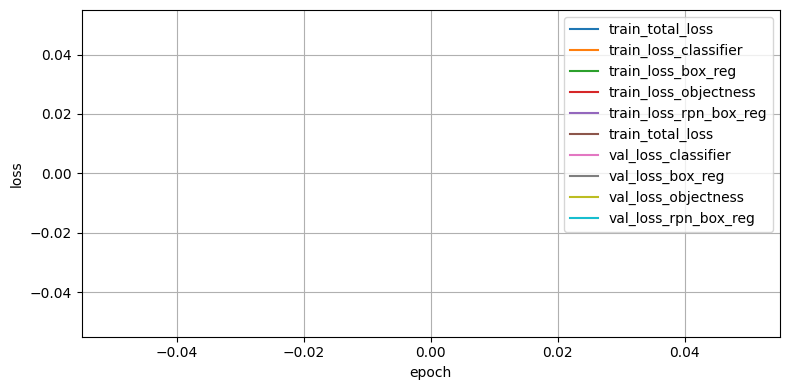

In [77]:
plt.figure(figsize=(8, 4))
plt.plot(tr_loss_total, label="train_total_loss")
plt.plot(tr_loss_classifier, label="train_loss_classifier")
plt.plot(tr_loss_box_reg,  label="train_loss_box_reg")
plt.plot(tr_loss_objectness, label="train_loss_objectness")
plt.plot(tr_loss_rpn_box_reg,  label="train_loss_rpn_box_reg")

plt.plot(val_loss_total, label="train_total_loss")
plt.plot(val_loss_classifier, label="val_loss_classifier")
plt.plot(val_loss_box_reg,  label="val_loss_box_reg")
plt.plot(val_loss_objectness, label="val_loss_objectness")
plt.plot(val_loss_rpn_box_reg,  label="val_loss_rpn_box_reg")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid("on")
plt.legend(loc='upper right')
plt.tight_layout()

# Confidence Threshold와 Non-Maximun Suppression(NMS)
* Confidence Threshold
    * Objectness 
    * Boundary box는 객체의 위치(x, y), 객체의 크기(w, h), box confidence score라는 것을 갖게 됨
    * 객체가 있는지 없는지에 대한 가능성과 정확도를 판단
    * Confidence Threshold -> 기준이 되는 값
* Non-Maximun Suppression(NMS)
    * 동일한 물체를 가리키는 여러 박스의 중복을 제거하기 위함
    * 각 물체별 가장 좋은 Box만 남기고 나머지는 다 지우는 역할
    * 방법은 Confidence Score와 IoU를 이용
        * 특정 Confidence Score 이하의 Bounding Box를 제거
        * 남은 Bounding Box들을 Confidence Score 기준으로 내림차순 정렬
        * 맨 앞 박스부터 기준으로, 이 박스와 IoU가 특정 Threshold 이상인 박스들은 모두 제거
         

In [78]:
import torch

In [79]:
def load_model(ckpt_path, num_classes, device):
    checkpoint = torch.load(ckpt_path, map_location=device)
    model = build_model(num_classes=num_classes)
    model.load_state_dict(checkpoint)
    model = model.to(device)
    model.eval()
    return model

In [81]:
is_cuda = True

NUM_CLASSES = 2
DEVICE = torch.device('cuda' if is_cuda and torch.cuda.is_available() else 'cpu')
data_dir = './DRIVING-DATASET/Detection/'
dataloaders = build_dataloader(data_dir, batch_size = 1)
num_classes = len(CLASS_NAME_TO_ID)

model = load_model(ckpt_path='./trained_model/model_30.pth', num_classes=NUM_CLASSES, device=DEVICE)

c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [82]:
from torchvision.ops import nms

In [91]:
def postprocess(prediction, conf_thres=0.2, IoU_threshold=0.1):
    pred_box = prediction['boxes'].cpu().detach().numpy()
    pred_label = prediction['labels'].cpu().detach().numpy()
    pred_conf = prediction['scores'].cpu().detach().numpy()
    
    conf_thres = 0.2
    valid_index = pred_conf > conf_thres
    pred_box = pred_box[valid_index]
    pred_label = pred_label[valid_index]
    pred_conf = pred_conf[valid_index]
    
    valid_index = nms(torch.tensor(pred_box.astype(np.float32)), torch.tensor(pred_conf), IoU_threshold)
    pred_box = pred_box[valid_index.numpy()]
    pred_conf = pred_conf[valid_index.numpy()]
    pred_label = pred_label[valid_index.numpy()]
    return np.concatenate((pred_box, pred_conf[:, np.newaxis], pred_label[:, np.newaxis]), axis=1)

In [92]:
from torchvision.utils import make_grid

In [97]:
pred_images = []
pred_labels =[]

for index, (images, _, filenames) in enumerate(dataloaders["val"]):
    images = list(image.to(DEVICE) for image in images)
    filename = filenames[0]
    
    image = make_grid(images[0].cpu().detach(), normalize=True).permute(1,2,0).numpy()
    image = (image * 255).astype(np.uint8)
    
    with torch.no_grad():
        prediction = model(images)
        
    prediction = postprocess(prediction[0])
    prediction[:, 2].clip(min=0, max=image.shape[1])
    prediction[:, 3].clip(min=0, max=image.shape[0])
    
    xc = (prediction[:, 0] + prediction[:, 2])/2
    yc = (prediction[:, 1] + prediction[:, 3])/2
    w = prediction[:, 2] - prediction[:, 0]
    h = prediction[:, 3] - prediction[:, 1]
    cls_id = prediction[:, 5]
    prediction_yolo = np.stack([xc,yc, w,h, cls_id], axis=1)
    
    pred_images.append(image)
    pred_labels.append(prediction_yolo)
    
    if index == 10:
        break

c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), e

In [98]:
from ipywidgets import interact

@interact(index=(0,len(pred_images)-1))
def show_result(index=0):
    result = visualize(pred_images[index], pred_labels[index][:, 0:4], pred_labels[index][:, 4])
    
    plt.figure(figsize=(6,6))
    plt.imshow(result)
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=10), Output()), _dom_classes=('widget-intera…

# Faster RCNN 모델 테스트

In [95]:
from time import time

In [99]:
video_path = './DRIVING-DATASET/sample_video.mp4'

In [100]:
transformer = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(size=(IMAGE_SIZE, IMAGE_SIZE)),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

@torch.no_grad()
def model_predict(image, model):
    tensor_image = transformer(image)
    tensor_image = tensor_image.to(DEVICE)
    
    prediction = model([tensor_image])
    return prediction

In [101]:
vid = cv2.VideoCapture(video_path)

while (vid.isOpened()):
    ret, frame = vid.read()
    
    if ret:
        since = time()
        ori_h, ori_w = frame.shape[:2]
        image = cv2.resize(frame, dsize=(IMAGE_SIZE, IMAGE_SIZE))
        prediction = model_predict(image, model)
        prediction = postprocess(prediction[0])
        prediction[:, [0,2]] *= (ori_w/IMAGE_SIZE)
        prediction[:, [1,3]] *= (ori_h/IMAGE_SIZE)
        prediction[:, 2].clip(min=0, max=ori_w)
        prediction[:, 3].clip(min=0, max=ori_h)
    
        xc = (prediction[:, 0] + prediction[:, 2])/2
        yc = (prediction[:, 1] + prediction[:, 3])/2
        w = prediction[:, 2] - prediction[:, 0]
        h = prediction[:, 3] - prediction[:, 1]
        cls_id = prediction[:, 5]
        prediction_yolo = np.stack([xc,yc, w,h, cls_id], axis=1)
        text= f"{(time() - since)*1000:.0f}ms/image"
        
        canvas = visualize(frame, prediction_yolo[:, 0:4], prediction_yolo[:, 4])
        cv2.putText(canvas, text, (20, 40), cv2.FONT_HERSHEY_PLAIN, 2, (255, 255, 255), 2)
        cv2.imshow('camera', canvas)
        
        key = cv2.waitKey(1)
        if key == 27:
            break
        if key == ord('s'):
            cv2.waitKey()
    
vid.release()
cv2.destroyAllWindows()